<a href="https://colab.research.google.com/github/viniciusgomesbatista/pythonintermediario/blob/main/ETL/Aula_de_Data_Cleaning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar as libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas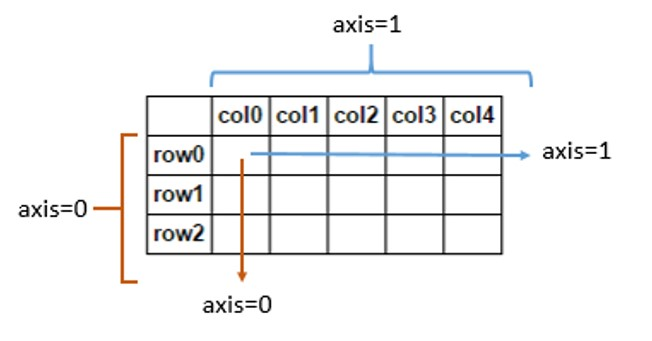

In [ ]:
# selecionar um dataframe
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Renomear colunas

Formato de um dicionário é {key:value}

In [ ]:
# 1° forma de renomear
df.rename({'sepal_length':'comprimento_sepala', 'sepal_width':'largura_sepala'}, axis=1, inplace=True)

In [ ]:
df.columns

Index(['comprimento_sepala', 'largura_sepala', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 2° forma de renomear
df.rename(columns={'petal_length':'comprimento_petala', 'petal_width':'largura_petala','species':'especies'}, inplace=True)

In [ ]:
df.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'especies'],
      dtype='object')

In [ ]:
df['especies'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.sample(5)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,especies
148,6.2,3.4,5.4,2.3,virginica
138,6.0,3.0,4.8,1.8,virginica
126,6.2,2.8,4.8,1.8,virginica
77,6.7,3.0,5.0,1.7,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [ ]:
# deixar a primeira letra maiúscula
df['especies'] =  df['especies'].str.capitalize()
df['especies'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
# deixar todas as letras maiúsculas
df['especies'] =  df['especies'].str.upper()
df['especies'].unique()

array(['SETOSA', 'VERSICOLOR', 'VIRGINICA'], dtype=object)

In [ ]:
# deixar todas as letras minúsculas
df['especies'] =  df['especies'].str.lower()
df['especies'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Dúvida : Crescente e decrescente .sort_values()


In [ ]:
#selecionar só as 3 primeiras letras
df['especies'] =  df['especies'].str[:3]
df['especies'].unique() #ver valores únicos da coluna

array(['set', 'ver', 'vir'], dtype=object)

In [ ]:
df['especies'].unique()

array(['set', 'ver', 'vir'], dtype=object)

In [ ]:
df['especies'].nunique()

3

In [ ]:
#substituir os valores
df['especies'] =  df['especies'].replace({'set':'setosa','ver':'versicolor','vir':'virginica'})
df['especies'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'especies'],
      dtype='object')

In [ ]:
# criar formato para a tabela
df.groupby('especies')[['comprimento_sepala', 'largura_sepala', 'comprimento_petala','largura_petala']].median()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
especies,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
df.groupby('especies')[['comprimento_sepala', 'largura_sepala', 'comprimento_petala','largura_petala']].median().reset_index()

,especies,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,setosa,5.0,3.4,1.50,0.2
1,versicolor,5.9,2.8,4.35,1.3
2,virginica,6.5,3.0,5.55,2.0


In [ ]:
# criar uma nova coluna
df['esp'] = df['especies'].str[:3]

In [ ]:
# tabela dinâmica
df.pivot_table(index='especies',columns='esp',aggfunc='mean')

comprimento_petala              comprimento_sepala                \
esp                       set   ver    vir                set    ver    vir   
especies                                                                      
setosa                  1.462   NaN    NaN              5.006    NaN    NaN   
versicolor                NaN  4.26    NaN                NaN  5.936    NaN   
virginica                 NaN   NaN  5.552                NaN    NaN  6.588   

           largura_petala               largura_sepala               
esp                   set    ver    vir            set   ver    vir  
especies                                                             
setosa              0.246    NaN    NaN          3.428   NaN    NaN  
versicolor            NaN  1.326    NaN            NaN  2.77    NaN  
virginica             NaN    NaN  2.026            NaN   NaN  2.974

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins = penguins[['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
penguins.pivot_table(index='species',columns='island',aggfunc='mean')

bill_depth_mm                       bill_length_mm             \
island           Biscoe      Dream  Torgersen         Biscoe      Dream   
species                                                                   
Adelie        18.370455  18.251786  18.429412      38.975000  38.501786   
Chinstrap           NaN  18.420588        NaN            NaN  48.833824   
Gentoo        14.982114        NaN        NaN      47.504878        NaN   

                     body_mass_g                           flipper_length_mm  \
island    Torgersen       Biscoe        Dream    Torgersen            Biscoe   
species                                                                        
Adelie     38.95098  3709.659091  3688.392857  3706.372549        188.795455   
Chinstrap       NaN          NaN  3733.088235          NaN               NaN   
Gentoo          NaN  5076.016260          NaN          NaN        217.186992   

                                   
island          Dream   Torgersen  
species                            
Adelie     189.732143  191.196078  
Chinstrap  195.823529         NaN  
Gentoo            NaN         NaN

In [ ]:
penguins.pivot_table(index='species',columns='island',values='bill_length_mm',aggfunc='mean')

island,Biscoe,Dream,Torgersen
species,,,
Adelie,38.975000,38.501786,38.95098
Chinstrap,NaN,48.833824,NaN
Gentoo,47.504878,NaN,NaN


.iloc() filtrar o dataframe a partir de um índice

# Limpeza dos dados

In [ ]:
# criar um novo dataframe
nfl_data = pd.read_csv('/content/NFL Play by Play 2009-2017 (v4).csv')

<ipython-input-36-7fe7ea53691d>:2: DtypeWarning: Columns (24,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv('/content/NFL Play by Play 2009-2017 (v4).csv')


In [ ]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [ ]:
nfl_data.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

In [ ]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24925 entries, 0 to 24924
Columns: 102 entries, Date to Season
dtypes: float64(35), int64(30), object(37)
memory usage: 19.4+ MB


In [ ]:
# criar um txt com nomes das colunas
nomes_colunas = nfl_data.columns.tolist()

nome_arquivo = 'nomes_colunas.txt'

# salvar o nome das colunas em um txt
with open(nome_arquivo,'w') as arquivo:
  for coluna in nomes_colunas:
    arquivo.write(coluna+'\n')

## Valores ausentes/nulos

In [ ]:
nfl_data.isnull().sum()

Date            0
GameID          0
Drive           0
qtr             0
down         3834
            ...  
Win_Prob     1640
WPA           383
airWPA      15423
yacWPA      15445
Season          1
Length: 102, dtype: int64

In [ ]:
#contagem de valores nulos por coluna
nfl_data.isnull().sum()[0:10]

Date               0
GameID             0
Drive              0
qtr                0
down            3834
time              17
TimeUnder          0
TimeSecs          17
PlayTimeDiff      34
SideofField       33
dtype: int64

In [ ]:
# percentual de valores nulos por coluna
nfl_data.isnull().mean()*100

Date         0.000000
GameID       0.000000
Drive        0.000000
qtr          0.000000
down        15.169175
              ...    
Win_Prob     6.503488
WPA          1.503404
airWPA      61.813544
yacWPA      61.869288
Season       0.001689
Length: 102, dtype: float64

In [ ]:
#len é a função que conta o n° de linhas do dataframe
len(nfl_data)

24925

In [ ]:
# n° de linha do dataframe
3834 / len(nfl_data)*100

15.382146439317953

In [ ]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [ ]:
# como eu sei o total de linhas e colunas -> utilizando .shape
nfl_data.shape

(24925, 102)

In [ ]:
#total de células
np.product(nfl_data.shape)

2542350

In [ ]:
# valores nulos
nfl_data.isnull().sum().sum()

706119

In [ ]:
# quantos dados faltantes totais temos?
total_cel = np.product(nfl_data.shape)
valores_perdidos = nfl_data.isnull().sum()
total_perd = valores_perdidos.sum()

#% percentual
percent = round((total_perd/total_cel)*100,2)

In [ ]:
print("De", total_cel,"células, temos", percent, "% dos dados nulos, que corresponde a",total_perd, "nulas")

De 2542350 células, temos 27.77 % dos dados nulos, que corresponde a 706119 nulas


# Eliminar valores

In [ ]:
#para removes valores ausentes eu vou utilizar .dropana()
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [ ]:
nfl_data.shape

(24925, 102)

In [ ]:
# remover todas as colunas com pelo menos um valor faltante
colunas_dropadas = nfl_data.dropna(axis=1)
colunas_dropadas.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,desc,PlayAttempted,Yards.Gained,...,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post
0,2009-09-10,2009091000,1,1,15,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,...,0,0,PIT,TEN,0,3,3,3,3,3
1,2009-09-10,2009091000,1,1,15,10,5,(14:53) B.Roethlisberger pass short left to H....,1,5,...,0,0,PIT,TEN,0,3,3,3,3,3
2,2009-09-10,2009091000,1,1,15,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,...,0,0,PIT,TEN,0,3,3,3,3,3
3,2009-09-10,2009091000,1,1,14,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,...,0,0,PIT,TEN,0,3,3,3,3,3
4,2009-09-10,2009091000,1,1,14,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,...,0,0,PIT,TEN,0,3,3,3,3,3


In [ ]:
colunas_dropadas.shape

(24925, 35)

In [ ]:
colunas_dropadas.dropna()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,desc,PlayAttempted,Yards.Gained,...,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post
0,2009-09-10,2009091000,1,1,15,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,...,0,0,PIT,TEN,0,3,3,3,3,3
1,2009-09-10,2009091000,1,1,15,10,5,(14:53) B.Roethlisberger pass short left to H....,1,5,...,0,0,PIT,TEN,0,3,3,3,3,3
2,2009-09-10,2009091000,1,1,15,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,...,0,0,PIT,TEN,0,3,3,3,3,3
3,2009-09-10,2009091000,1,1,14,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,...,0,0,PIT,TEN,0,3,3,3,3,3
4,2009-09-10,2009091000,1,1,14,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,...,0,0,PIT,TEN,0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24920,2009-11-15,2009111512,27,4,3,2,8,(2:11) (Shotgun) T.Brady pass incomplete short...,1,0,...,0,0,IND,NE,0,1,1,1,1,1
24921,2009-11-15,2009111512,27,4,3,0,8,Timeout #3 by NE at 02:08.,1,0,...,0,0,IND,NE,1,1,1,1,1,0
24922,2009-11-15,2009111512,27,4,3,2,9,(2:08) (Shotgun) T.Brady pass short right to K...,1,1,...,0,0,IND,NE,0,0,1,0,1,0
24923,2009-11-15,2009111512,28,4,2,10,15,(2:00) (Shotgun) P.Manning pass short left to ...,1,15,...,0,0,IND,NE,0,1,1,0,1,0


# Preencher valores ausentes

In [ ]:
# criar um subconjunto
subset_nfl = nfl_data.loc[:,'EPA':'Season'].head() #selecionando um subconjunto para preencher
subset_nfl

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [ ]:
# substituir os valores NaN por 0
subset_nfl.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


In [ ]:
# substituir os valores NaN por 'nulo'
subset_nfl.fillna('nulo')

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,nulo,nulo,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,nulo,nulo,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,nulo,nulo,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,nulo,nulo,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,nulo,nulo,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,nulo,nulo,2009.0


In [ ]:
# substituir pelo valor seguinte
subset_nfl.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


In [ ]:
# substituir por valor médio da coluna
subset_nfl.fillna(subset_nfl.mean())

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,1.125336,-1.942674,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.037209,-0.059670,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,1.125336,-1.942674,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.037209,-0.059670,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,1.125336,-1.942674,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.037209,-0.059670,2009.0


In [ ]:
#substituir pela valor da mediana da coluna
subset_nfl.fillna(subset_nfl.median())

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,1.125336,-1.942674,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.037209,-0.059670,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,1.125336,-1.942674,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.037209,-0.059670,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,1.125336,-1.942674,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.037209,-0.059670,2009.0


# Scaling e Normalization / Escalanamento (ou Dimensionamento) e Normalização

In [3]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

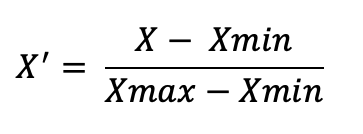

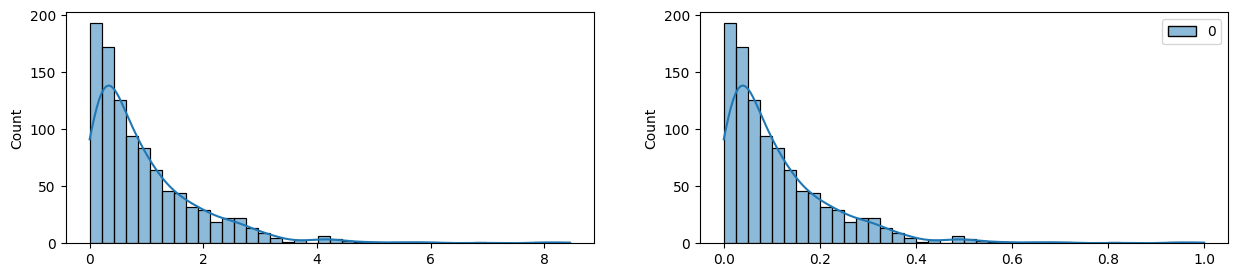

In [4]:
#gerar 1000 pontos de forma aleatória para exponencial
original_data = np.random.exponential(size=1000)

#min-max scale para 0 a 1
scaled_data = minmax_scaling(original_data, columns=[0])

#plotar os gráficos
fig, ax = plt.subplots(1,2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True )
sns.histplot(scaled_data, ax=ax[1], kde=True)
plt.show()

In [5]:
print('O mínimo é', original_data.min())
print('O máximo é', original_data.max())

O mínimo é 0.0011838173410546515
O máximo é 8.453507629425282


# Normalization / Normalização

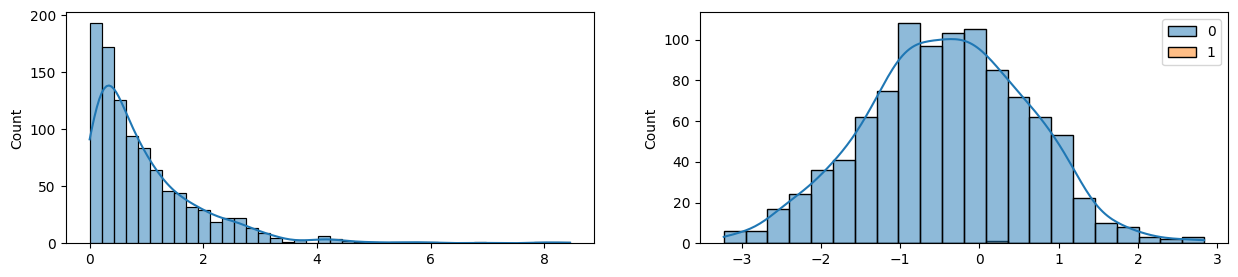

In [8]:
# normaliza os dados com boxcox
normalized_data = stats.boxcox(original_data)

#plotar os gráficos
fig, ax = plt.subplots(1,2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True )
sns.histplot(normalized_data, ax=ax[1], kde=True)
plt.show()

# Tratamento de Datas

caminho do arquivo no drive /content/drive/MyDrive/Dados/catalog.csv

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [24]:
# ler o arquivo
landslides = pd.read_csv('/content/drive/MyDrive/Dados/catalog.csv')

In [25]:
# setar para reprodutibilidade
np.random.seed(0)

In [26]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [27]:
landslides.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [28]:
landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [29]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [30]:
# checar o tipo de dado da coluna
landslides['date'].dtype

dtype('O')

## Converter as datas

In [31]:
landslides['date'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [32]:
landslides['date'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [33]:
landslides['date'].dtype

dtype('<M8[ns]')

In [34]:
# caso a colune dê muitos de conversão , posso pedir para que o pandas possa inferir uma data correta
landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)

<ipython-input-34-a46d2a5a3a7e>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)


## Selecionar o dia do mês

In [35]:
day_landslides = landslides['date_parsed'].dt.day

In [36]:
day_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [38]:
landslides['day_date'] = landslides['date_parsed'].dt.day
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed,day_date
0,34,2007-03-02,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02,2.0
1,42,2007-03-22,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22,22.0
2,56,2007-04-06,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06,6.0
3,59,2007-04-14,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14,14.0
4,61,2007-04-15,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15,15.0


In [39]:
# mês do ano
landslides['month_date'] = landslides['date_parsed'].dt.month
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed,day_date,month_date
0,34,2007-03-02,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02,2.0,3.0
1,42,2007-03-22,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22,22.0,3.0
2,56,2007-04-06,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06,6.0,4.0
3,59,2007-04-14,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14,14.0,4.0
4,61,2007-04-15,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15,15.0,4.0


In [42]:
# ver o dia da semana
landslides['week_day'] = landslides['date_parsed'].dt.weekday

In [43]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed,day_date,month_date,week_day
0,34,2007-03-02,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02,2.0,3.0,4.0
1,42,2007-03-22,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22,22.0,3.0,3.0
2,56,2007-04-06,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06,6.0,4.0,4.0
3,59,2007-04-14,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14,14.0,4.0,5.0
4,61,2007-04-15,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15,15.0,4.0,6.0


In [44]:
landslides['week_day'].unique()

array([ 4.,  3.,  5.,  6.,  1.,  0.,  2., nan])

<ipython-input-47-cb5001424985>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_landslides, bins=30)


<Axes: xlabel='date_parsed', ylabel='Density'>

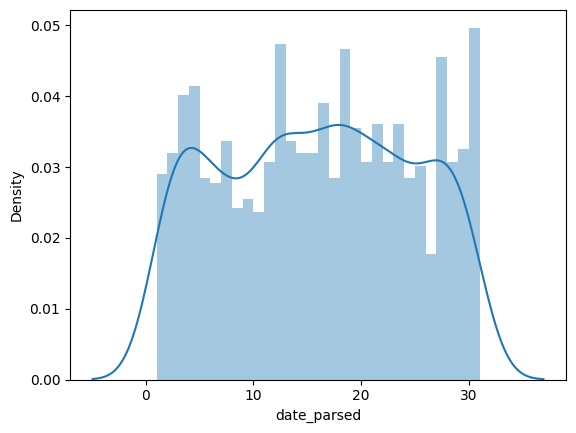

In [47]:
# retirar ps valores nulos
day_landslides = day_landslides.dropna()

#plotar os dias do mês
sns.distplot(day_landslides, bins=30)

<ipython-input-48-da8aa4bdafab>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(month, bins=40)


<Axes: xlabel='date_parsed', ylabel='Density'>

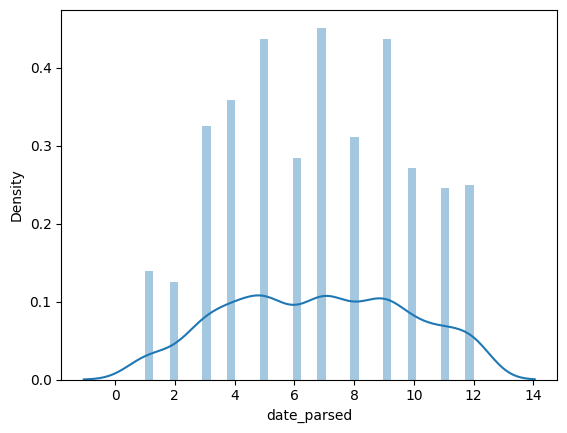

In [48]:
#criar uma série de mês
month = landslides['date_parsed'].dt.month
#retirar os nulos
month.dropna()

#plotar o gráfico
sns.distplot(month, bins=40)

<ipython-input-49-54ee0cfb7600>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(week_day, bins=40)


<Axes: xlabel='date_parsed', ylabel='Density'>

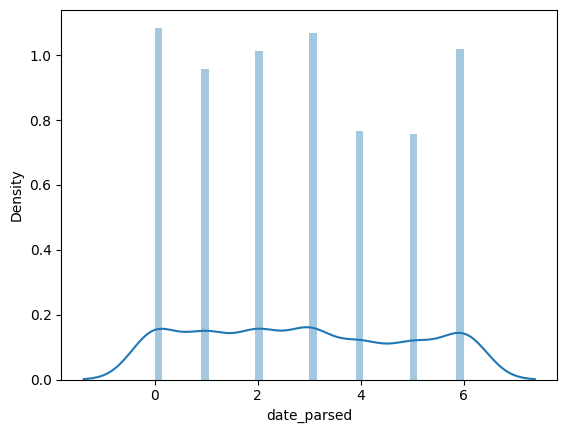

In [49]:
week_day = landslides['date_parsed'].dt.weekday

week_day.dropna()

sns.distplot(week_day, bins=40)